In [54]:
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import pandas as pd 
from pandas.plotting import scatter_matrix
import numpy as np
plt.style.use('bmh')
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
from sklearn.svm import SVR



In [55]:
# import the data for prediction 
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [56]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [57]:
# looking into our data, there are no outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


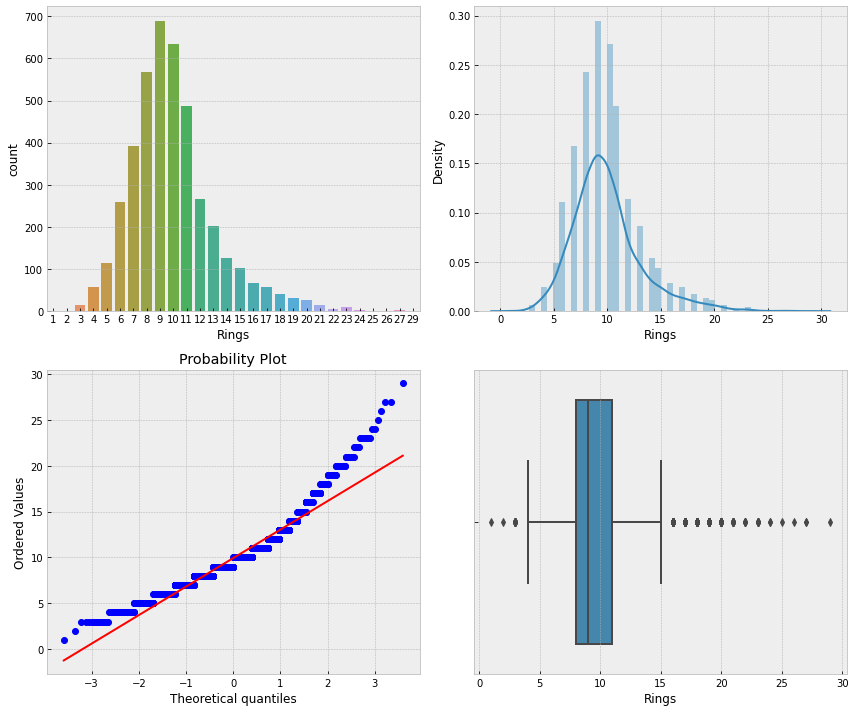

In [58]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.countplot(df.Rings)

plt.subplot(2,2,2)
sns.distplot(df.Rings)

plt.subplot(2,2,3)
stats.probplot(df.Rings, plot=plt)

plt.subplot(2,2,4)
sns.boxplot(df.Rings) 

plt.tight_layout()


<Figure size 1440x360 with 0 Axes>

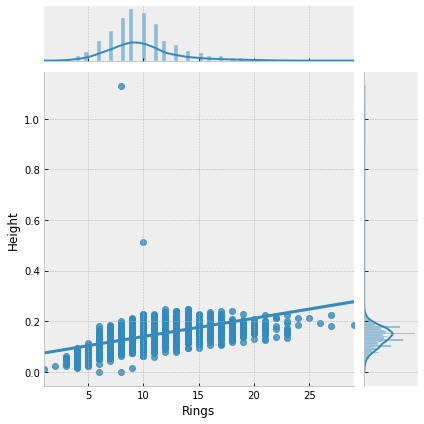

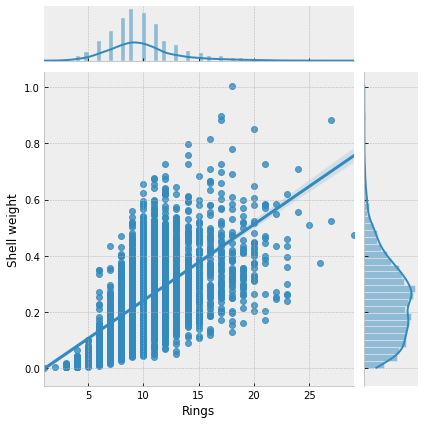

In [59]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=df, x='Rings', y='Height', kind='reg')
_ = sns.jointplot(data=df, x='Rings', y='Shell weight', kind='reg')

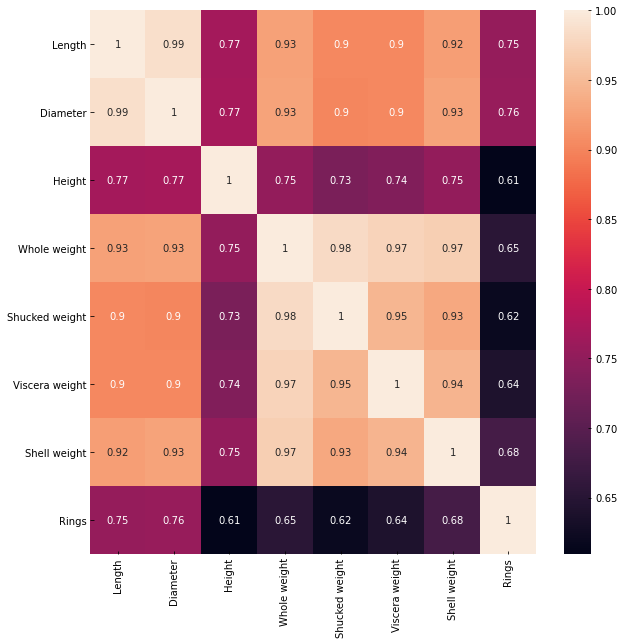

In [60]:
i_df = df[df['Rings'] < 10]

plt.figure(figsize=(10, 10))
corr = i_df.corr()
_ = sns.heatmap(corr, annot=True)

In the following plots we observe the positive correlation between the Size attributes and Rings:



In [61]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=i_df x='Rings', y='Length',  kind='reg')
_ = sns.jointplot(data=i_df, x='Rings', y='Diameter', kind='reg')
_ = sns.jointplot(data=i_df, x='Rings', y='Height', kind='reg')

SyntaxError: invalid syntax (<ipython-input-61-b7f553298af9>, line 3)

The violin plots bellow show that the median of Size attributes increases as instances are grouped by Rings:

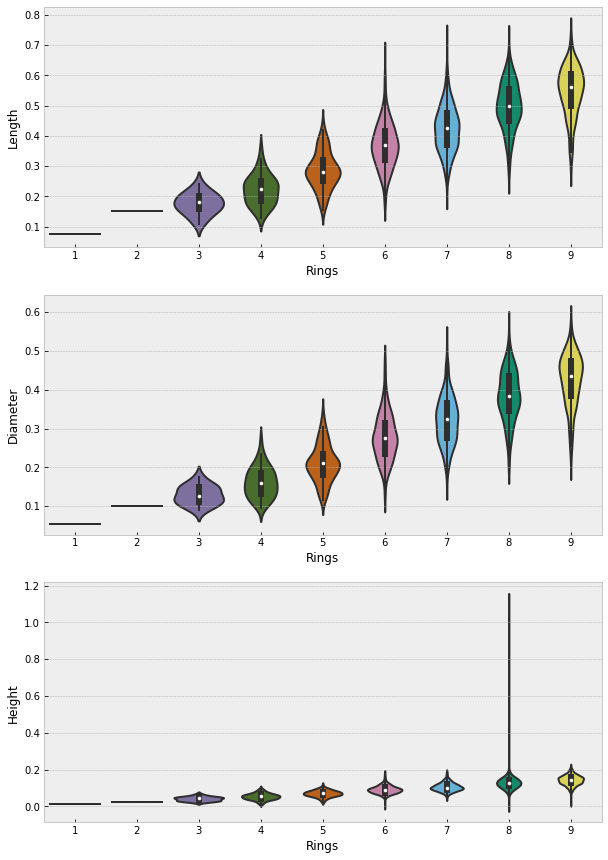

In [62]:
plt.figure(figsize=(10, 15))

colors = sns.color_palette()

rows = 3
cols = 1
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=i_df, x='Rings', y='Length')

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=i_df, x='Rings', y='Diameter')

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=i_df, x='Rings', y='Height')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


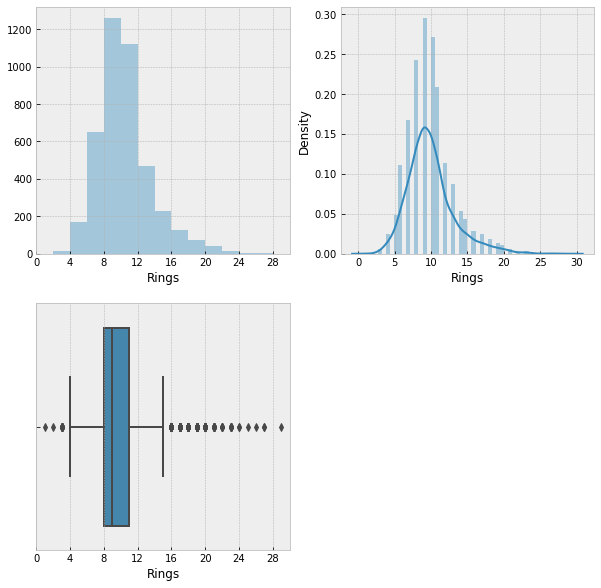

In [63]:
rows = 2
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(df['Rings'], kde=False, bins=range(0, 31, 2))

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['Rings'])

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(df['Rings'])

In [ ]:
# removing outliers 
df = df[df['Height'] < 0.4]

plt.figure(figsize=(15, 15))

colors = sns.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Height'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Height'], color=colors[i % 3])

Weight Attributes
The weight attributes were analyzed following a similar approach to the Size attributes analysis. A similar distributions were observed, however, for the weight attributes the bell curve is a little larger.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

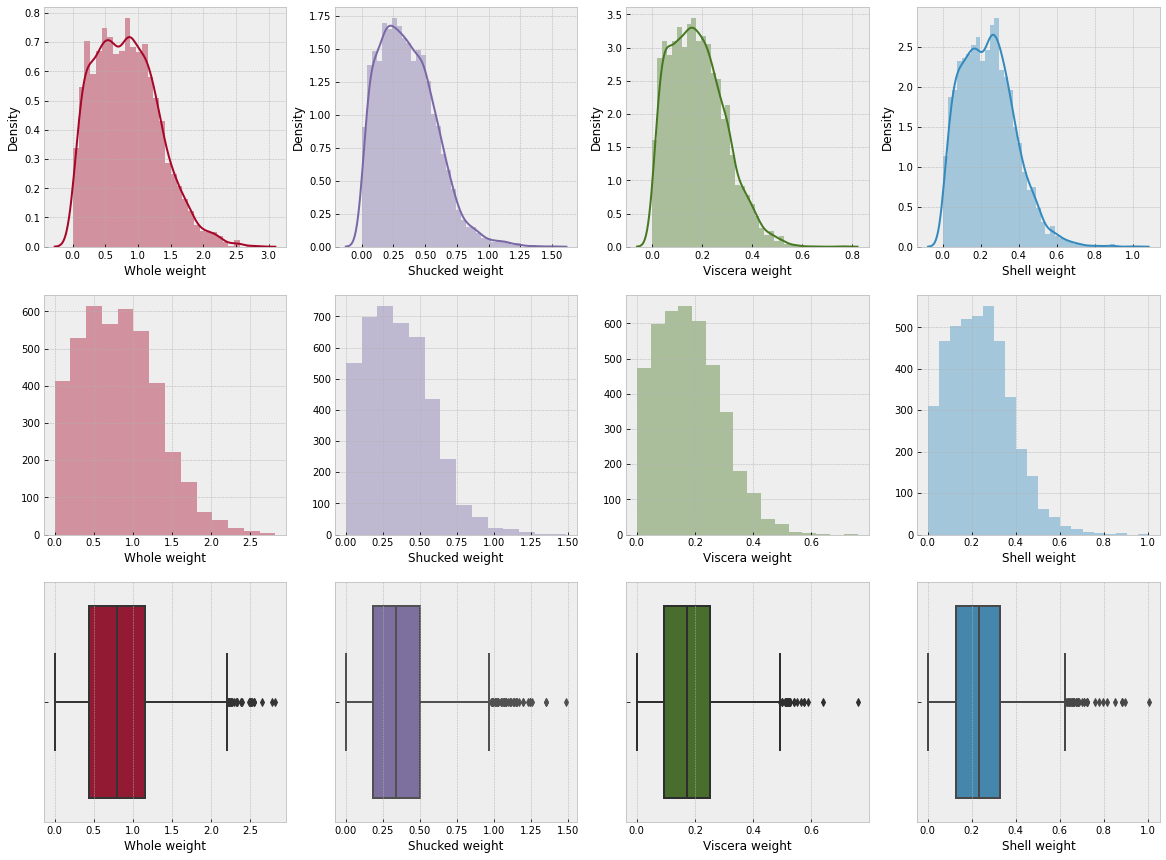

In [64]:
plt.figure(figsize=(20, 15))

colors = sns.color_palette()

rows = 3
cols = 4
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['Whole weight'], color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['Shucked weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['Viscera weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['Shell weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['Whole weight'], kde=False, bins=14, color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['Shucked weight'], kde=False, bins=14, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['Viscera weight'], kde=False, bins=16, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['Shell weight'], kde=False, bins=20, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(df['Whole weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(df['Shucked weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(df['Viscera weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(df['Shell weight'], color=colors[i % cols])

<Figure size 1440x360 with 0 Axes>

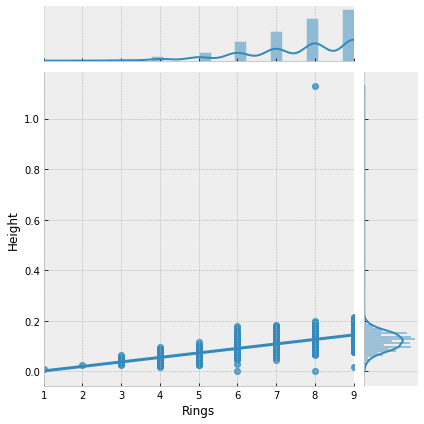

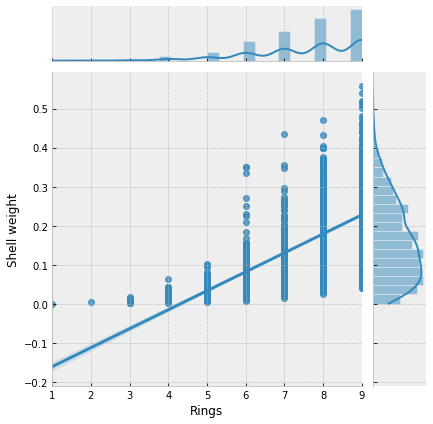

In [65]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=i_df, x='Rings', y='Height',  kind='reg')
_ = sns.jointplot(data=i_df, x='Rings', y='Shell weight', kind='reg')

On the other hand, when we consider only samples with more than 10 Rings we observe that correlation decays drastically to near 0 (zero):

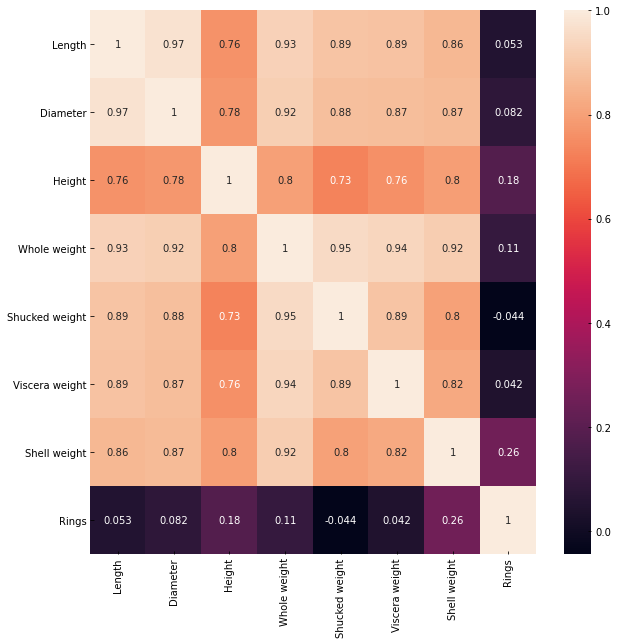

<Figure size 1440x720 with 0 Axes>

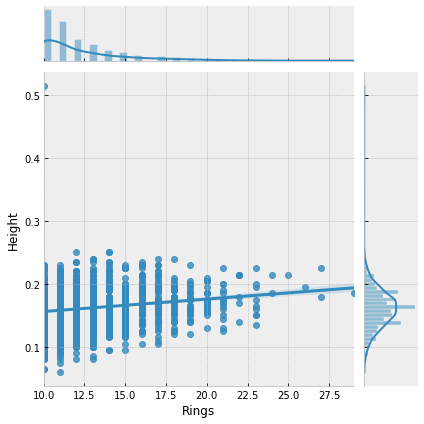

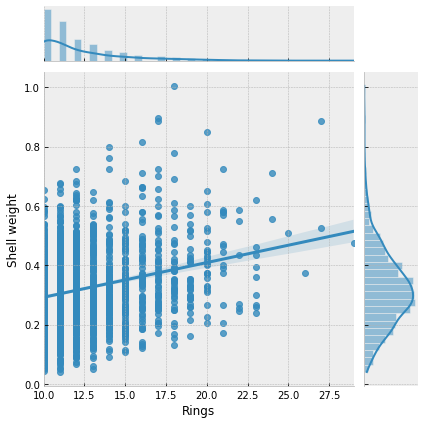

In [70]:
a_df = df[df['Rings'] >= 10]

plt.figure(figsize=(10, 10))
corr = a_df.corr()
_ = sns.heatmap(corr, annot=True)

plt.figure(figsize=(20, 10))

_ = sns.jointplot(data=a_df, y='Height', x='Rings', kind='reg')
_ = sns.jointplot(data=a_df, y='Shell weight', x='Rings', kind='reg')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


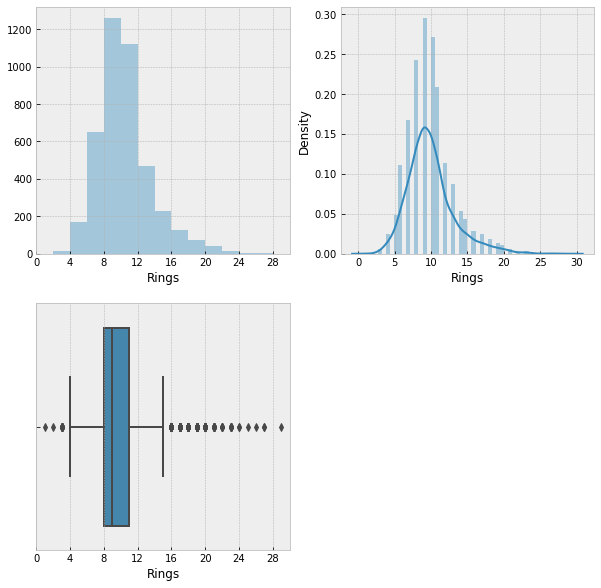

In [71]:
rows = 2
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(df['Rings'], kde=False, bins=range(0, 31, 2))

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['Rings'])

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(df['Rings'])

Influence of Sex on attributes Finally, we analyze how the Sex category influences the distribution of variables Rings, Height and Shell weight. Our objective is learn if the different categories of abalones have different distribution parameters or even form. To accomplish this objective, we visualize the distribution of each one of these parameters in relation to Sex. Finally, we analyze how the different Sex categories of abalones influence the correlation of Rings, Height and Shell weight.

Our first step is to analyze how Sex categories influence the number of Rings. We observe that the median of Rings for the I category is lower than the median for M and F categories.

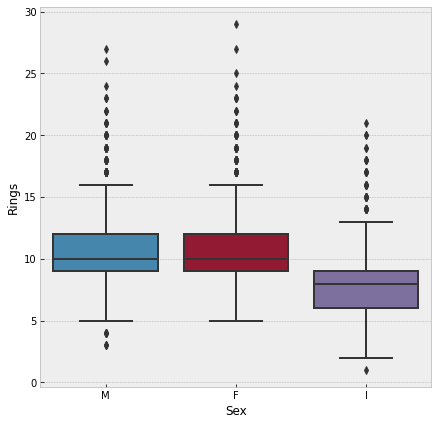

In [72]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=df, x='Sex', y='Rings')

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


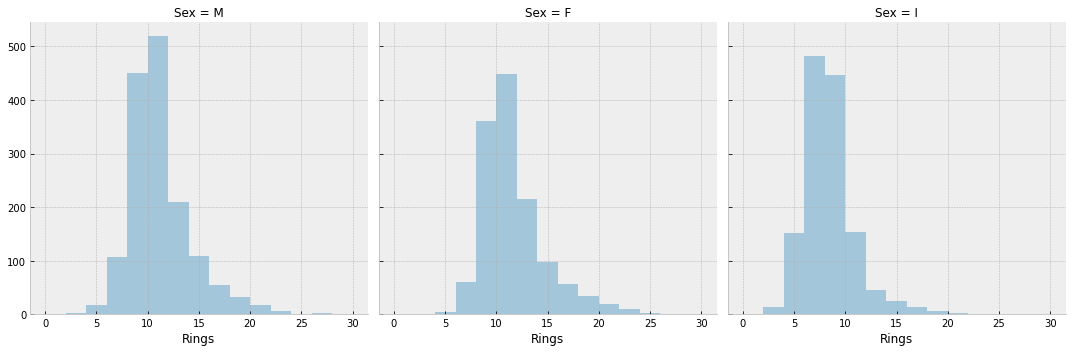

In [73]:
g = sns.FacetGrid(df, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Rings', kde=False, bins=range(0, 31, 2))

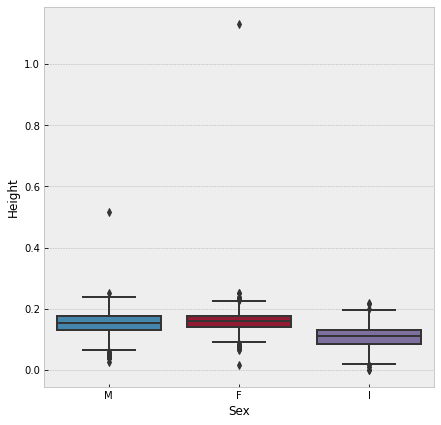

In [74]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=df, x='Sex', y='Height')

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


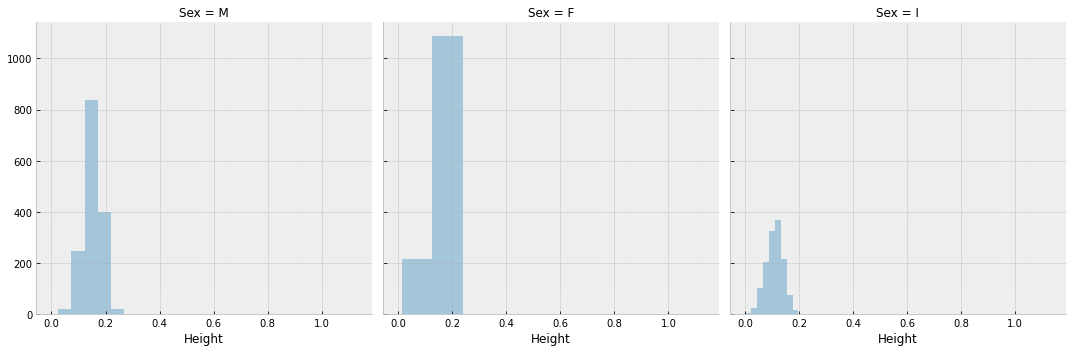

In [75]:
g = sns.FacetGrid(df, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)


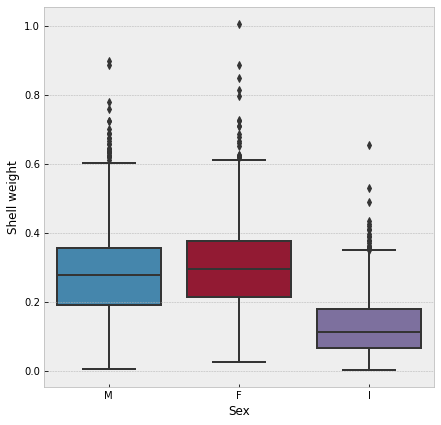

In [76]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=df, x='Sex', y='Shell weight')


C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


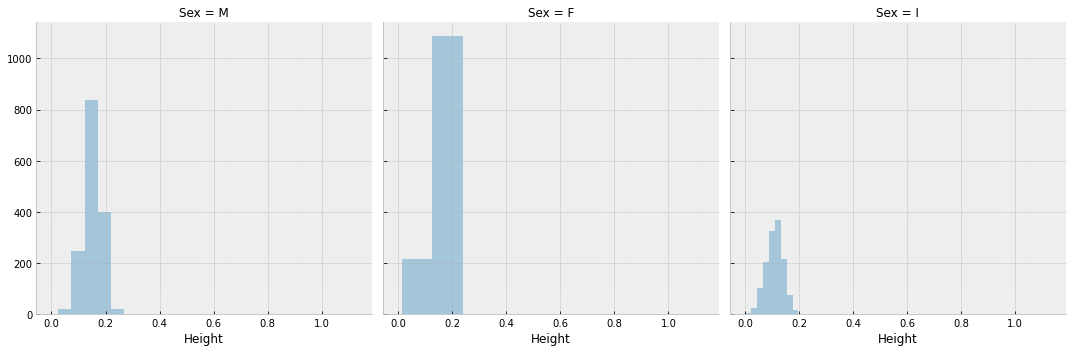

In [78]:
g = sns.FacetGrid(df, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)

 we analyze how the categories influence the correlations Ring x Height and Ring x Shell weight. We already concluded that these attributes has stronger correlation for lower values of Rings. Because Infant abalones have lower values of Rings, the consequence is that Height and Shell weight have stronger correlation to rings. Observing the regression curve for the Infant category, we notice that its inclination is closer to 45



<Figure size 1440x360 with 0 Axes>

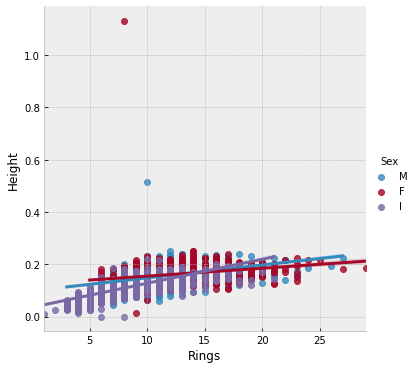

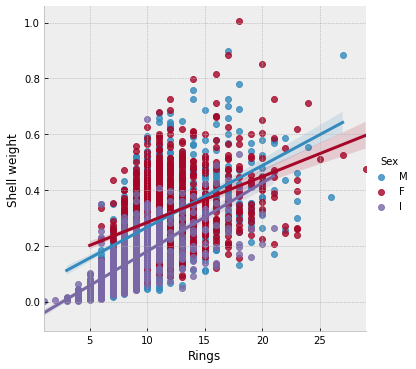

In [79]:
plt.figure(figsize=(20, 5))

_ = sns.lmplot(data=df, x='Rings', y='Height', hue='Sex', fit_reg=True)
_ = sns.lmplot(data=df, x='Rings', y='Shell weight', hue='Sex', fit_reg=True)

In this section, we analyze the attributes that represents the dimensions of an abalone. These attributes are Lenght, Diameter and Height. For each of these attributes we plotted two histograms and their respective boxplot. The first histogram is a density histogram and a kernel density estimate, and the second is the absolute frquencies of the attribute, with some adjustments to ticks and bins. Once more, we observe an approximate normal distribution. However we notice the high peak formed by the Height histogram. Analyzing the Height boxplot we conclude that the high peak is formed due the presence of two observations that lie far beyond the central positions of the distribution.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

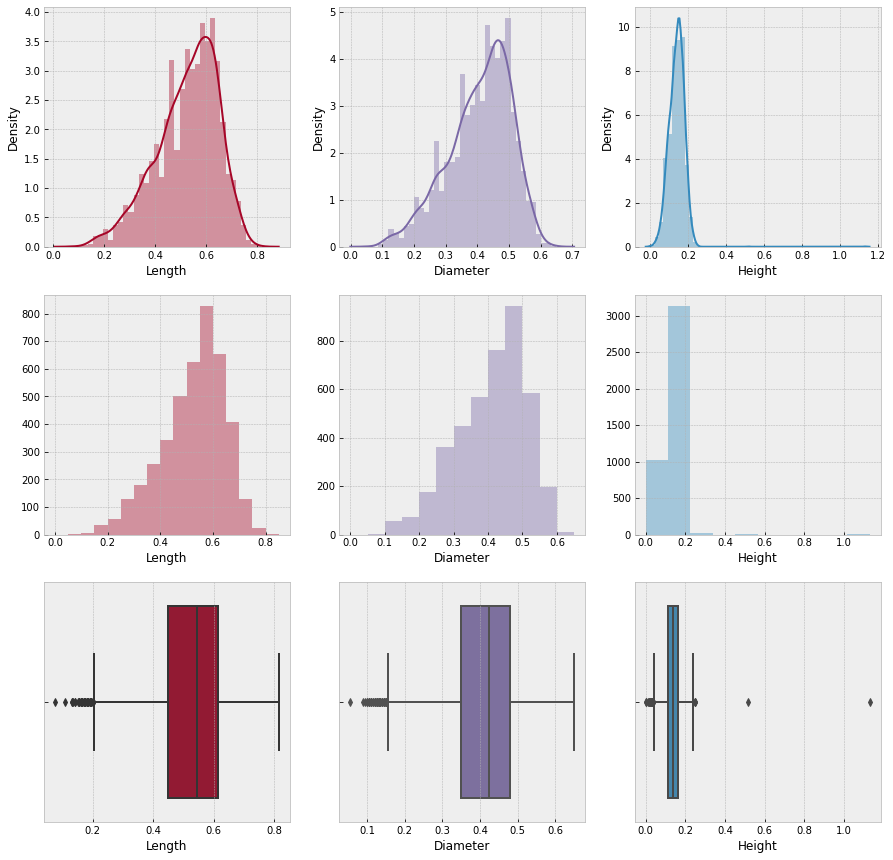

In [80]:
plt.figure(figsize=(15, 15))

colors = sns.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Height'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Height'], color=colors[i % 3])

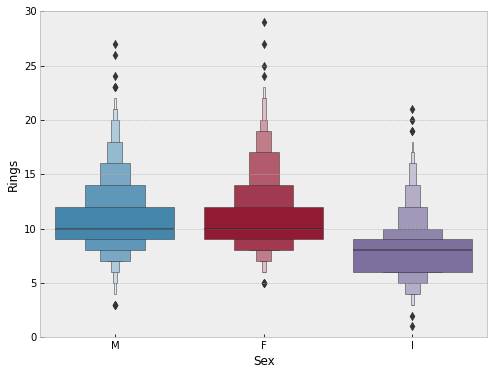

In [81]:
data = pd.concat([df['Rings'], df['Sex']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='Sex', y="Rings", data=df)
fig.axis(ymin=0, ymax=30);


In [82]:
corr=df.corr()
corr.shape

(8, 8)

In [83]:
df[df.Height == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [84]:
# let's explore sex, it is a categorical variable 
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Height vs. Rings
We suspect height is also strongly correlated with rings as it did with whole weight, let's visualize it again with a scatter plot to see if that is so.

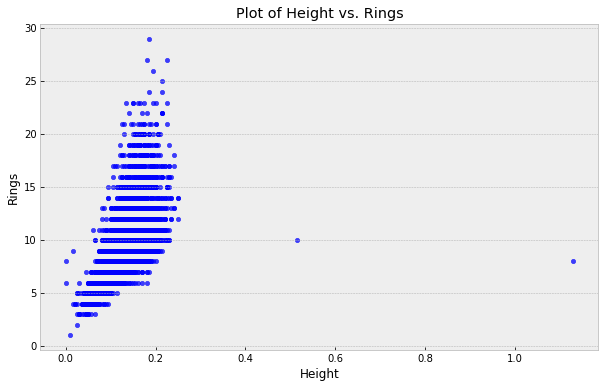

In [12]:
df.plot.scatter("Height", "Rings", figsize=(10, 6),
                title="Plot of Height vs. Rings", alpha=0.75)
axes = plt.gca()
axes.xaxis.grid(False)
plt.show()

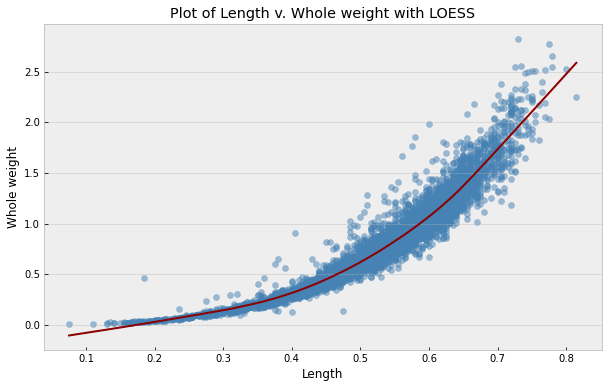

In [13]:
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):
    import statsmodels.api as sm
    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = plt.figure(figsize=(10, 6))
    axes = figure.add_subplot(1, 1, 1)
    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs(0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="steelblue", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")
    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)
    axes.xaxis.grid(False)
    plt.show()
lowess_scatter(df, "Length", "Whole weight")

We can see the plot kind of looks like exponential function with monotonically increasing relationship, and as expected as the weight increase we expect the length of shell to increase as abalone adds new growth rings to it's shell.

Diameter vs. Whole weight
Similar to length, since length and diameter are perpendicular to each other we expect diameter to also show exponential like curve and grow as abalone adds new growth rings.

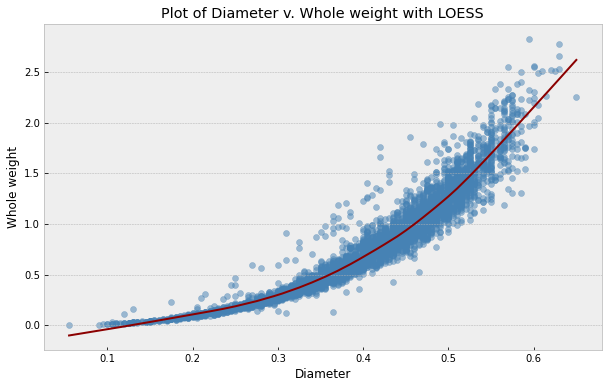

In [14]:
lowess_scatter(df, "Diameter", "Whole weight")

Indeed, we see an exponential curve, similar to length vs. whole weight.

Now, we need to explore the relationship between the predictor variable rings vs. height, length, diameter and whole weight, which we deem important as we expect as length, height, diameter and whole weight increase so should the rings as abalone grows in size, which also reflects its age.

Whole weight vs. Rings
We don't expect to have a strong correlation with whole weights, as we know difference species of abalone have different sizes, so total weight won't tells us any thing much about rings.



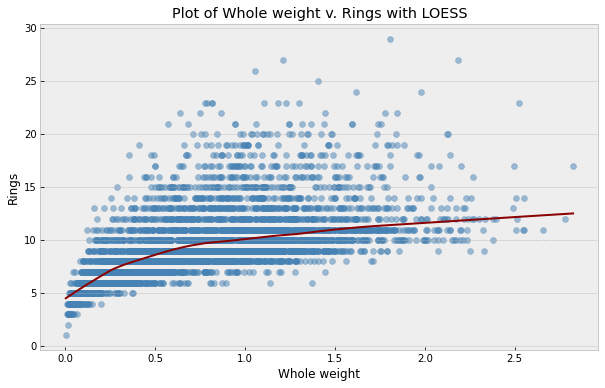

In [15]:
lowess_scatter(df, "Whole weight", "Rings")

As we expected, rings have really weak correlation monotonic increasing relationship with whole weight, the shape of loess line somewhat represents logarithmic curve.



length vs. Rings
We expect length, along with diameter and height to have high slightly higher correlation as increasing the ring size regardless of species increases their length, diameter and height as they add new growth rings to their shell. We can visualize it with LOESS line through a scatter plot.



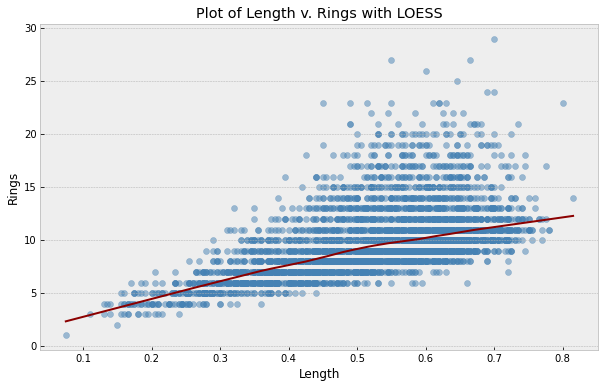

In [16]:
lowess_scatter(df, "Length", "Rings")

As we expected there is indeed presence of weak monotonically linear relation ship of rings with length.

Diameter vs. Rings
As we stated above, we also expect diameter to also have weak linear monotonically increasing relationship with rings, which we can visualize it with scatter plot and loess line through it.

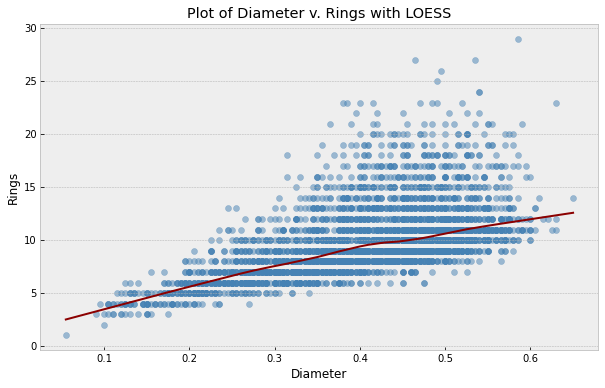

In [17]:
lowess_scatter(df, "Diameter", "Rings")


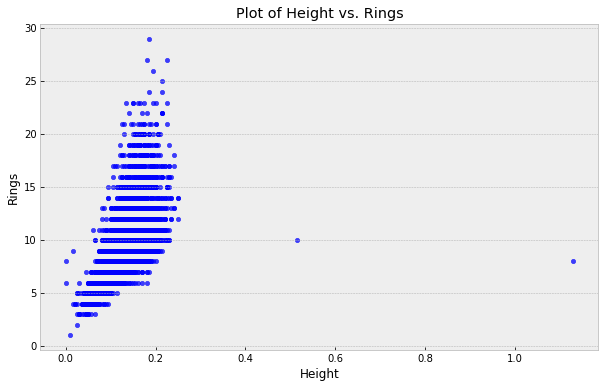

In [18]:
df.plot.scatter("Height", "Rings", figsize=(10, 6),
                title="Plot of Height vs. Rings", alpha=0.75)
axes = plt.gca()
axes.xaxis.grid(False)
plt.show()

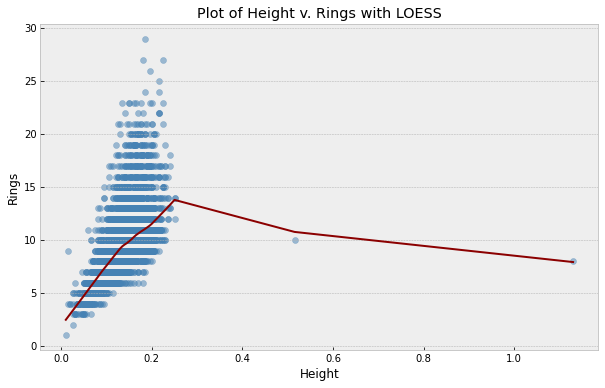

In [19]:
no_outlier_df = df[(df['Height'] > 0) & (df['Height'] < 100)]
lowess_scatter(no_outlier_df, "Height", "Rings")


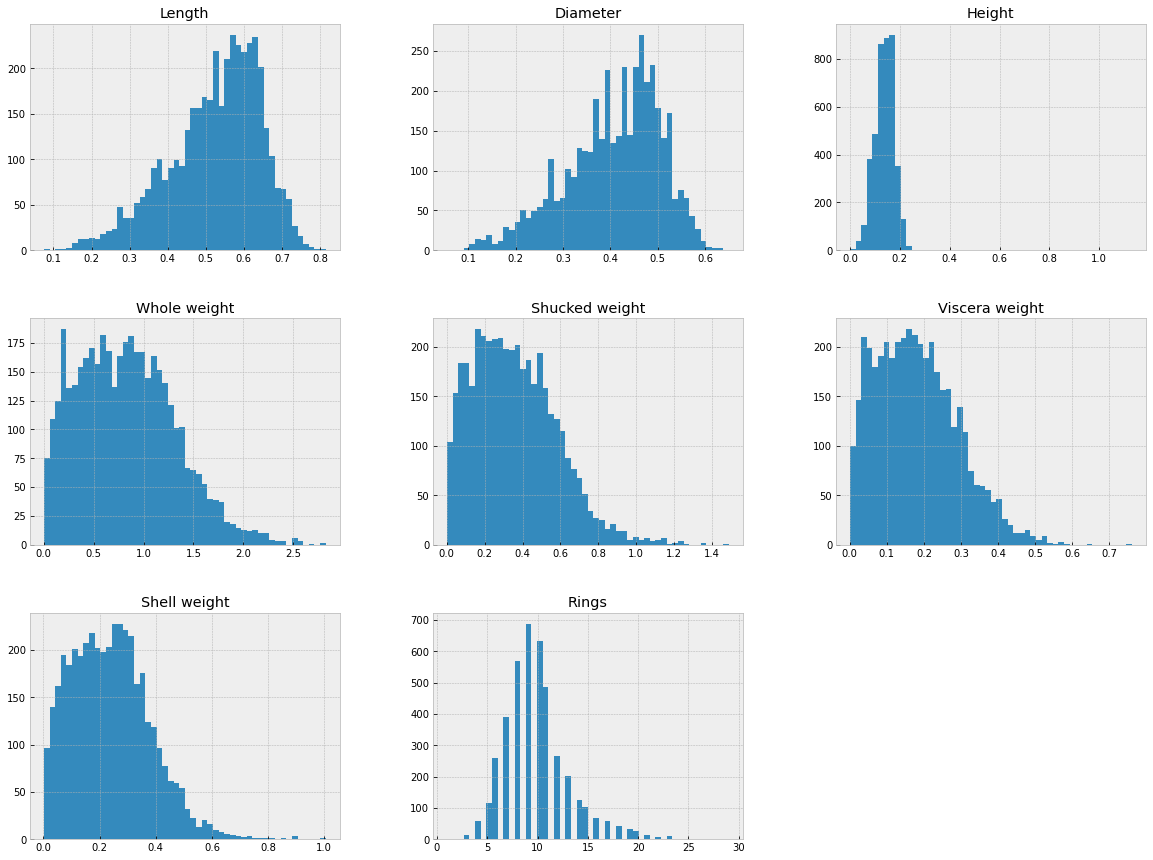

In [20]:
# visualizing the features
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [21]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

In [22]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [23]:
categorical_features

Index(['Sex'], dtype='object')

In [24]:
skew_values = skew(df[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


In [25]:
# Find the r value aka standard correlation coefficient 
corr_matrix = df.corr()
corr_matrix['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

array([[<AxesSubplot:xlabel='Length', ylabel='Length'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Length'>,
        <AxesSubplot:xlabel='Height', ylabel='Length'>,
        <AxesSubplot:xlabel='Whole weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Shucked weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Viscera weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Shell weight', ylabel='Length'>],
       [<AxesSubplot:xlabel='Length', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Height', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Shucked weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Viscera weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Shell weight', ylabel='Diameter'>],
       [<AxesSubplot:xlabel='Length', ylabel='Height'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Height'>,
        <AxesSubplot:xlabe

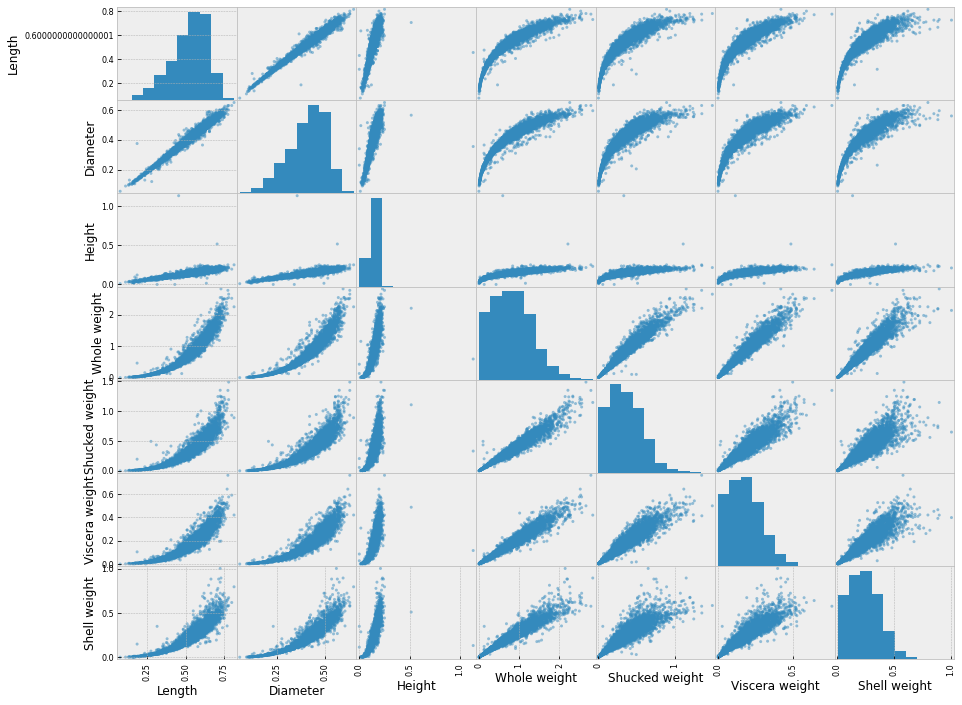

In [26]:
# plot variables against each other to find the relationship 
attributes = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
scatter_matrix(df[attributes], figsize=(15, 12))


<AxesSubplot:>

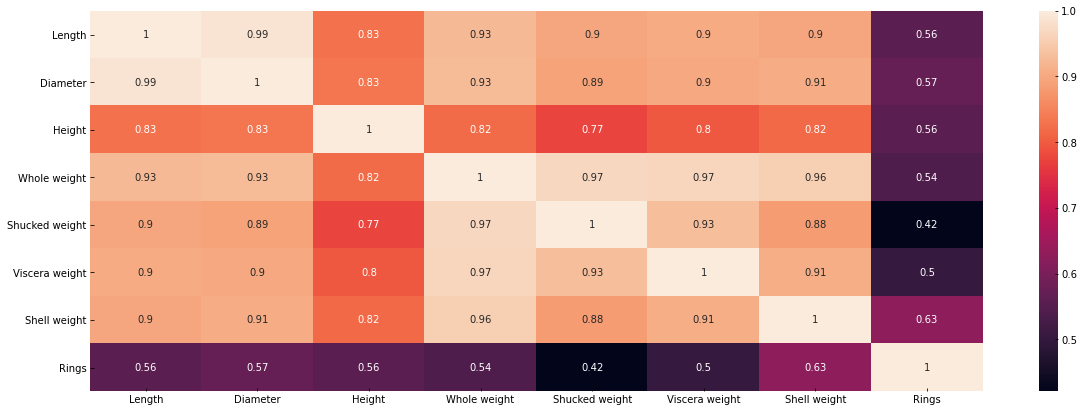

In [27]:
plt.figure(figsize=(20,7))
sns.heatmap(df[numerical_features].corr(), annot=True)

In [28]:
# convert text labels to integer labels
sex_label = LabelEncoder()
df['Sex'] = sex_label.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [29]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [30]:
# define the features and the labels
# dropping the sex column due to the lack of correlation 

X = df.drop(['Rings', 'Sex'], axis=1)
y = df['Rings']
# divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


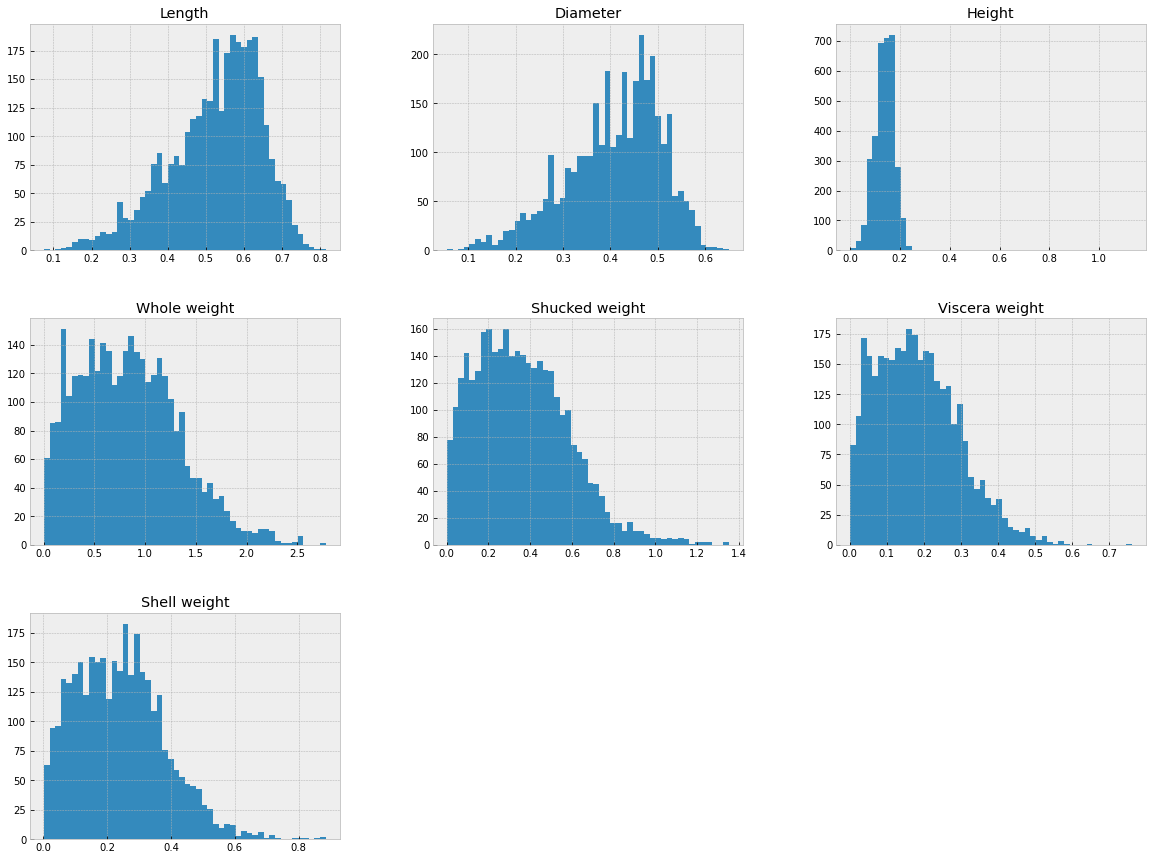

In [31]:
X_train.hist(bins=50, figsize=(20, 15))
plt.show()

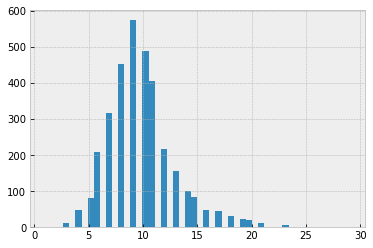

In [32]:
y_train.hist(bins=50)
plt.show()

In [33]:
# standardize our data 
# standardization is less affected by outliers
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [34]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
 #fine tune hyperparamaters
knn_grid = [
    {'n_neighbors': [i+1 for i in range(10)] }, 
]
knn = KNeighborsRegressor()
knn_search = GridSearchCV(knn, knn_grid, scoring='neg_mean_squared_error', cv=5,
                          return_train_score=True, n_jobs=-1)
model=knn_search.fit(X_train, y_train)

In [36]:
knn_search.best_params_

{'n_neighbors': 10}

In [87]:
result = knn_search.cv_results_
for mean_acc, params in zip(result['mean_test_score'], result['params']):
    print(mean_acc, params)

-8.513166492127851 {'n_neighbors': 1}
-6.3615190023540364 {'n_neighbors': 2}
-5.719789867201323 {'n_neighbors': 3}
-5.36643313708905 {'n_neighbors': 4}
-5.18830444939717 {'n_neighbors': 5}
-5.02133466002723 {'n_neighbors': 6}
-4.956162918968507 {'n_neighbors': 7}
-4.873355349279021 {'n_neighbors': 8}
-4.8139989522145985 {'n_neighbors': 9}
-4.751570894086267 {'n_neighbors': 10}


In [88]:
# try other models
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma}

In [89]:
svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1, n_iter=20, verbose=1)
modeel=svm_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.2s finished


In [40]:
svm_search.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

In [41]:
result = svm_search.cv_results_
for mse, params in zip(result['mean_test_score'], result['params']):
    print(mse, params)

-1795.5991247123718 {'kernel': 'poly', 'gamma': 1, 'C': 0.1}
-5.032296285571961 {'kernel': 'linear', 'gamma': 1, 'C': 10}
-5.225220127311025 {'kernel': 'linear', 'gamma': 0.01, 'C': 0.1}
-5.049542907896364 {'kernel': 'linear', 'gamma': 0.01, 'C': 1}
-5.8224958488007275 {'kernel': 'linear', 'gamma': 1, 'C': 0.01}
-6.639567908936764 {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}
-5.049542907896364 {'kernel': 'linear', 'gamma': 0.1, 'C': 1}
-8.319498477278334 {'kernel': 'poly', 'gamma': 0.01, 'C': 10}
-12.506458888170798 {'kernel': 'sigmoid', 'gamma': 1, 'C': 0.01}
-8.545301900136506 {'kernel': 'poly', 'gamma': 0.01, 'C': 1}
-1868.5428386683695 {'kernel': 'poly', 'gamma': 1, 'C': 1}
-681367.0286942592 {'kernel': 'sigmoid', 'gamma': 0.1, 'C': 10}
-16.561704936415257 {'kernel': 'sigmoid', 'gamma': 0.01, 'C': 10}
-49333.45368187362 {'kernel': 'sigmoid', 'gamma': 1, 'C': 1}
-7.998661833401376 {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.01}
-4906836.105324281 {'kernel': 'sigmoid', 'gamma': 1, 'C': 10}

In [42]:
ensemble_grid =  {'n_estimators': [(i+1)*10 for i in range(20)],
                 'criterion': ['mse', 'mae'],
                 'bootstrap': [True, False]}

ensemble = RandomForestRegressor()
ensemble_search = RandomizedSearchCV(ensemble, ensemble_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1, n_iter=10, verbose=1)
ensemble_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [43]:
ensemble_search.best_params_

{'n_estimators': 190, 'criterion': 'mae', 'bootstrap': True}

In [44]:
esult = ensemble_search.cv_results_
for mse, params in zip(result['mean_test_score'], result['params']):
    print(mse, params)

-1795.5991247123718 {'kernel': 'poly', 'gamma': 1, 'C': 0.1}
-5.032296285571961 {'kernel': 'linear', 'gamma': 1, 'C': 10}
-5.225220127311025 {'kernel': 'linear', 'gamma': 0.01, 'C': 0.1}
-5.049542907896364 {'kernel': 'linear', 'gamma': 0.01, 'C': 1}
-5.8224958488007275 {'kernel': 'linear', 'gamma': 1, 'C': 0.01}
-6.639567908936764 {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}
-5.049542907896364 {'kernel': 'linear', 'gamma': 0.1, 'C': 1}
-8.319498477278334 {'kernel': 'poly', 'gamma': 0.01, 'C': 10}
-12.506458888170798 {'kernel': 'sigmoid', 'gamma': 1, 'C': 0.01}
-8.545301900136506 {'kernel': 'poly', 'gamma': 0.01, 'C': 1}
-1868.5428386683695 {'kernel': 'poly', 'gamma': 1, 'C': 1}
-681367.0286942592 {'kernel': 'sigmoid', 'gamma': 0.1, 'C': 10}
-16.561704936415257 {'kernel': 'sigmoid', 'gamma': 0.01, 'C': 10}
-49333.45368187362 {'kernel': 'sigmoid', 'gamma': 1, 'C': 1}
-7.998661833401376 {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.01}
-4906836.105324281 {'kernel': 'sigmoid', 'gamma': 1, 'C': 10}

In [45]:
svm_reg = svm_search.best_estimator_
svm_reg.fit(X_train, y_train)

SVR(C=10, gamma=0.01)

In [46]:
svm_pred = svm_reg.predict(X_test)
print(np.sqrt(mean_squared_error(svm_pred, y_test)))

2.4155856094776382


K-nearest Neighbours (KNN) Intuition: The intuition behind KNN is really simple. Given a point and asked to predict which category/class it belongs to, KNN simply checks the k nearest points to the given point and outputs the category that is represented in the majority of the k nearest points. How are the nearest points found? The most common way is by using the Euclidean distance, the distance formula that we used to use in school.

In [47]:
knn_reg = knn_search.best_estimator_
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [48]:
knn_pred = knn_reg.predict(X_test)
print(np.sqrt(mean_squared_error(knn_pred, y_test)))

2.4204793111476453


In [49]:
ensemble_reg = ensemble_search.best_estimator_
ensemble_reg.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', n_estimators=190)

In [50]:
ensemble_pred = ensemble_reg.predict(X_test)
print(np.sqrt(mean_squared_error(ensemble_pred, y_test)))

2.3149560792225854


In [90]:
modeel.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)

NameError: name 'Y_train' is not defined

In [ ]:
# saving the model to the local file system

filename = 'finalized_model.pickle'

pickle.dump(regression, open(filename, 'wb'))

# prediction using the saved model

loaded_model = pickle.load(open(filename, 'rb'))

